In [2]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv("merged_data.csv")

In [4]:
#select only numerical datatypes
data_n = data.select_dtypes(include = ["number"])

In [5]:
data_n = data_n[~data_n["Y2C"].isin([-2, -3, -4])] #dropping negative y2c values

X_unimputed = data_n.drop(["Y2C"], axis = 1)


In [6]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy = "median") #creating an imputer to fillna values with the col median

#seperating the closed and open school data
closed_data = data_n[data_n["Y2C"] != -1]
open_data = data_n[data_n["Y2C"] == -1]

#imputing both datasets na's
open_data_imputed = imputer.fit_transform(open_data)
closed_data_imputed = imputer.fit_transform(closed_data)

#turing them into dataframes and preserving the col names
open_data_imputed_df = pd.DataFrame(open_data_imputed, columns = open_data.columns)
closed_data_imputed_df = pd.DataFrame(closed_data_imputed, columns = closed_data.columns)

#merging the full data back together
full_data = pd.concat([closed_data_imputed_df, open_data_imputed_df], axis = 0)

full_data.head()

,Unnamed: 0,UNITID,Year,YearClosed,Y2C,Closing,Total_Assets,Total_Liabilities,Buildings_Ending_Balance,Total_for_Plant_Ending_Balance,...,EFYUNKNW,EFTEUG,SFAFORM,FTEMP15,F2PELL,F_ATHLTC,EFYASIAM,EFYASIAW,EFYHISPT,EFYHISPM
0,178.0,110918.0,2023.0,2023.0,0.0,0.0,7117677.5,3087854.5,1184400.0,3599222.0,...,7.0,374.5,1.0,1.0,1.0,3.0,2.0,4.0,44.0,13.0
1,248.0,115728.0,2023.0,2023.0,0.0,0.0,7117677.5,3087854.5,1184400.0,3599222.0,...,7.0,374.5,1.0,1.0,1.0,3.0,2.0,4.0,44.0,13.0
2,589.0,137801.0,2023.0,2023.0,0.0,0.0,7117677.5,3087854.5,1184400.0,3599222.0,...,7.0,374.5,1.0,1.0,1.0,3.0,2.0,4.0,44.0,13.0
3,828.0,149763.0,2023.0,2024.0,1.0,0.0,7117677.5,3087854.5,1184400.0,3599222.0,...,7.0,374.5,1.0,1.0,1.0,3.0,2.0,4.0,44.0,13.0
4,905.0,153621.0,2023.0,2023.0,0.0,0.0,7117677.5,3087854.5,1184400.0,3599222.0,...,7.0,374.5,1.0,1.0,1.0,3.0,2.0,4.0,44.0,13.0


In [7]:
X = full_data.drop(["Y2C"], axis = 1)
y = full_data["Y2C"]

In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_unimputed, X_test_unimputed, y_train, y_test = train_test_split(X, y ,test_size = 0.2, random_state = 42)

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [12]:
model = RandomForestClassifier(random_state = 42, n_estimators = 100)

In [13]:
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [14]:
y_pred = model.predict(X_test)

In [15]:
cm = confusion_matrix(y_test, y_pred)[2:, 2:]

confusion_matrix(y_test, y_pred)

array([[7035,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,   28,    5,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    3,   25,    0,    0,    0,    1,    0,    0,    0,    0],
       [   0,    0,    0,   12,    6,    1,    0,    0,    0,    0,    0],
       [   0,    0,    0,   19,    2,    4,    0,    0,    0,    0,    0],
       [   0,    0,    0,    6,   14,    1,    0,    0,    0,    0,    0],
       [   0,    0,    4,    0,    0,    0,    3,    5,    1,    0,    0],
       [   0,    0,    2,    0,    0,    0,    9,    0,    0,    0,    0],
       [   0,    0,    1,    0,    0,    0,    0,    2,    0,    1,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    4,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    1,    0]])

In [16]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7035
           1       0.90      0.85      0.88        33
           2       0.68      0.86      0.76        29
           3       0.32      0.63      0.43        19
           4       0.09      0.08      0.09        25
           5       0.17      0.05      0.07        21
           6       0.23      0.23      0.23        13
           7       0.00      0.00      0.00        11
           8       0.00      0.00      0.00         4
           9       0.00      0.00      0.00         4
          10       0.00      0.00      0.00         1

    accuracy                           0.99      7195
   macro avg       0.31      0.34      0.31      7195
weighted avg       0.99      0.99      0.99      7195



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


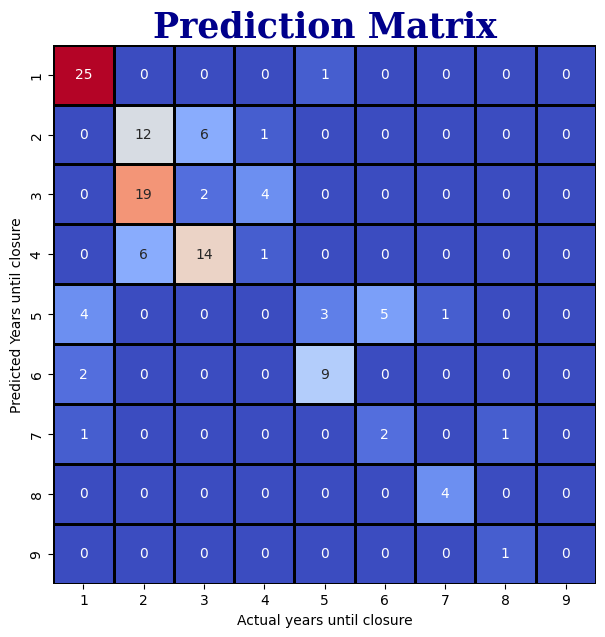

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (7, 7))
sns.heatmap(cm, cmap = "coolwarm", annot = True, lw = 1, linecolor = "black", cbar = False)
plt.xlabel("Actual years until closure")
plt.ylabel("Predicted Years until closure")
plt.title("Prediction Matrix", fontdict={"weight" :"bold", "font" :"serif", "color" :"darkblue", "size" : 25})

#adjusting the tick labels
ticks = plt.xticks()[0]
plt.xticks(ticks, [int(t + 1) for t in ticks])
plt.yticks(ticks, [int(t + 1) for t in ticks])

plt.show()

In [18]:
model_2 = RandomForestClassifier(n_estimators=100, random_state = 42)
model_2.fit(X_train_unimputed, y_train)

RandomForestClassifier(random_state=42)

In [19]:
model_2_preds = model_2.predict(X_test)

In [20]:
confusion_matrix(y_test, model_2_preds)
print(classification_report(y_test, model_2_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7035
           1       0.90      0.85      0.88        33
           2       0.68      0.86      0.76        29
           3       0.32      0.63      0.43        19
           4       0.09      0.08      0.09        25
           5       0.17      0.05      0.07        21
           6       0.23      0.23      0.23        13
           7       0.00      0.00      0.00        11
           8       0.00      0.00      0.00         4
           9       0.00      0.00      0.00         4
          10       0.00      0.00      0.00         1

    accuracy                           0.99      7195
   macro avg       0.31      0.34      0.31      7195
weighted avg       0.99      0.99      0.99      7195



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [21]:
X_new = X.drop(["YearClosed", "Closing", "Year"], axis = 1)

In [22]:
X_train_new, X_test_new, y_train, y_test = train_test_split(X_new, y ,test_size = 0.2, random_state = 42)

In [23]:
new_model = RandomForestClassifier(random_state = 42, n_estimators=42)
new_model.fit(X_train_new, y_train)

RandomForestClassifier(n_estimators=42, random_state=42)

In [24]:
new_preds = new_model.predict(X_test_new)

In [25]:
cm2 = confusion_matrix(y_test, new_preds)[2:, 2:]

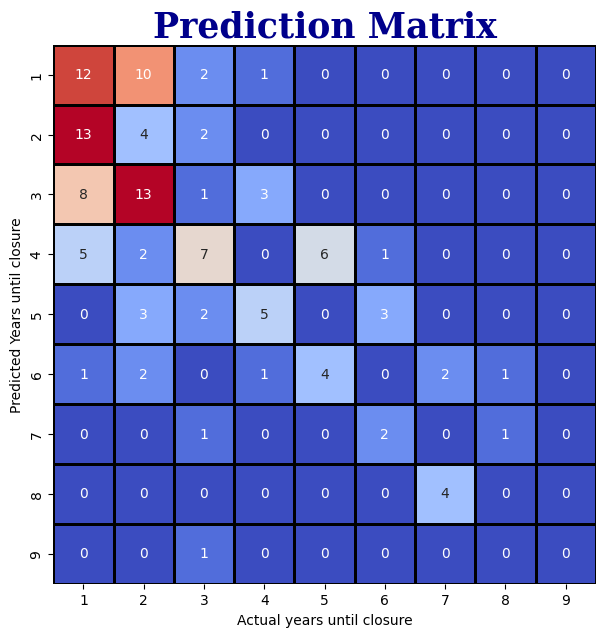

In [26]:
plt.figure(figsize = (7, 7))
sns.heatmap(cm2, cmap = "coolwarm", annot = True, lw = 1, linecolor = "black", cbar = False)
plt.xlabel("Actual years until closure")
plt.ylabel("Predicted Years until closure")
plt.title("Prediction Matrix", fontdict={"weight" :"bold", "font" :"serif", "color" :"darkblue", "size" : 25})

#adjusting the tick labels
ticks = plt.xticks()[0]
plt.xticks(ticks, [int(t + 1) for t in ticks])
plt.yticks(ticks, [int(t + 1) for t in ticks])

plt.show()

In [27]:
print(classification_report(y_test, new_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7035
           1       0.90      0.85      0.88        33
           2       0.27      0.41      0.33        29
           3       0.12      0.21      0.15        19
           4       0.06      0.04      0.05        25
           5       0.00      0.00      0.00        21
           6       0.00      0.00      0.00        13
           7       0.00      0.00      0.00        11
           8       0.00      0.00      0.00         4
           9       0.00      0.00      0.00         4
          10       0.00      0.00      0.00         1

    accuracy                           0.98      7195
   macro avg       0.21      0.23      0.22      7195
weighted avg       0.98      0.98      0.98      7195



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [28]:
feature_names = X_train_new.columns
importances = new_model.feature_importances_

In [82]:

indices = np.argsort(importances)[::-1]

ranks = [i + 1 for i in range(len(indices))]
features_sorted = [feature_names[i] for i in indices]
importances_sorted = [importances[i] for i in indices]

# Create the DataFrame
df = pd.DataFrame({
    'Rank': ranks,
    'Feature': features_sorted,
    'Importance': importances_sorted
})

df.set_index("Rank", inplace = True)

df

,Feature,Importance
Rank,,
1,GIS4A32,0.128913
2,GIS4N40,0.076349
3,SCUGDGSK,0.066420
4,FORM_F,0.051256
5,NPT431,0.037276
6,Total_for_Plant_Ending_Balance,0.032460
7,Buildings_Ending_Balance,0.031563
8,Unnamed: 0,0.031342
9,GRN4N52,0.030177


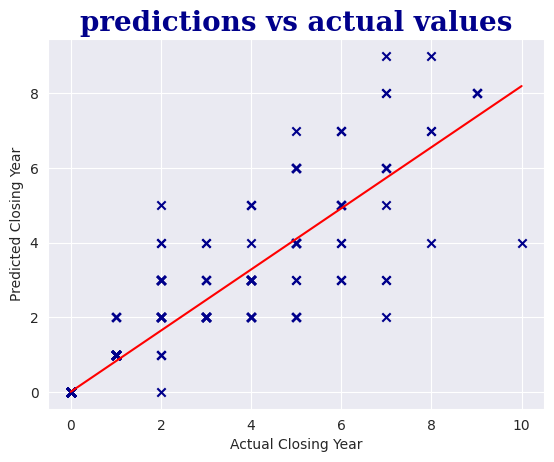

In [51]:
sns.set_style("darkgrid")
plt.scatter(y_test, new_preds, c = "darkblue", marker = "x")
plt.title("predictions vs actual values", fontdict = {"font" : "serif", "weight" : "bold", "color": "darkblue", "size" : 20})
plt.xlabel("Actual Closing Year")
plt.ylabel("Predicted Closing Year")

slope, intercept = np.polyfit(y_test, new_preds, 1)

# Create a range of x values for plotting the trend line
x_vals = np.linspace(min(y_test), max(y_test), 100)
trend_line = slope * x_vals + intercept

# Plot the trend line
plt.plot(x_vals, trend_line, color="red", label="Trend line")


In [53]:
pip install dalex

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 38.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for dalex: filename=dalex-1.7.2-py3-none-any.whl size=1042899 sha256=1e0c47e759d948c556b0e446bbcc3331fc9526bc6a1597f87667e037a6b56206
  Stored in directory: /root/.cache/pip/wheels/cd/5e/ec/848120d5b913158656c0f8ef316233dd3356effa64aef19fba
Successfully built dalex


In [54]:
import dalex as dx

pf_0 = lambda m, d: m.predict_proba(d)[:, 2]

X_new = X_new.reset_index(drop=True)

exp = dx.Explainer(new_model, X_new, y, predict_function= pf_0)


Preparation of a new explainer is initiated

  -> data              : 35974 rows 57 cols
  -> target variable   : 35974 values
  -> model_class       : sklearn.ensemble._forest.RandomForestClassifier (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function <lambda> at 0x7de65f363560> will be used
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.0, mean = 0.00482, max = 0.881
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.0714, mean = 0.0755, max = 9.86
  -> model_info        : package sklearn

A new explainer has been created!


In [84]:
Notre_Dame = X_test_new[X_test_new["UNITID"] == 152080].head(1)

In [202]:
data_n[data_n["Y2C"] == 8]["UNITID"].head()

closing_school = data_n[(data_n["UNITID"] == 149763) & (data_n["Y2C"] == 6)]

closing_school.drop(["YearClosed", "Closing", "Year", "Y2C"], axis = 1, inplace =True)


In [55]:
rf_model_exp = dx.Explainer(new_model, X_new, y, label = "closing schools random forest")

Preparation of a new explainer is initiated

  -> data              : 35974 rows 57 cols
  -> target variable   : 35974 values
  -> model_class       : sklearn.ensemble._forest.RandomForestClassifier (default)
  -> label             : closing schools random forest
  -> predict function  : <function yhat_proba_default at 0x7de65edaff60> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.0, mean = 0.00469, max = 1.0
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.0238, mean = 0.0756, max = 9.98
  -> model_info        : package sklearn

A new explainer has been created!


In [57]:
new_model_rf = rf_model_exp.model_parts()

In [58]:
new_model_rf.result

,variable,dropout_loss,label
0,Fringe_Benefits,0.251620,closing schools random forest
1,Instructional_Salaries_and_Wages,0.257983,closing schools random forest
2,EFYTOTLM,0.270928,closing schools random forest
3,CSHISPW,0.272226,closing schools random forest
4,EFYHISPT,0.279106,closing schools random forest
5,EFYUNKNW,0.279554,closing schools random forest
6,EFYWHITT,0.279613,closing schools random forest
7,CSHISPT,0.281334,closing schools random forest
8,EFYWHITW,0.282738,closing schools random forest
9,NPT431,0.282901,closing schools random forest


In [83]:
new_model_rf.plot(max_vars= len(new_model_rf.result), bar_width= 20)

In [97]:
closed_preds = new_preds[new_preds >= 1]

In [93]:
closed_y_test = y_test[y_test >= 1]

In [116]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, accuracy_score

In [117]:
accuracy_score(closed_y_test, closed_preds)

0.22641509433962265

In [113]:
closed_preds = closed_preds[:159]

In [114]:
closed_y_test = closed_y_test[:159]

In [122]:
new_preds = []
for pred, y_test in zip(closed_preds, closed_y_test):
  if y_test + 1 == pred or y_test - 1 == pred or y_test + 2 == pred or y_test - 2 == pred:
    pred = y_test
    new_preds.append(pred)
  else:
    pred = pred
    new_preds.append(pred)

In [123]:
accuracy_score(closed_y_test, new_preds)

0.7358490566037735

In [ ]:
#next steps is finding the variable names mean, figuring out what variables huntington can effect, what